### The Problem statement:

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
data=pd.read_csv('resources/Advertising.csv')

In [6]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data.shape

(200, 5)

In [8]:
data.drop('Unnamed: 0',axis=1,inplace=True)


What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [9]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<Axes: xlabel='newspaper', ylabel='sales'>

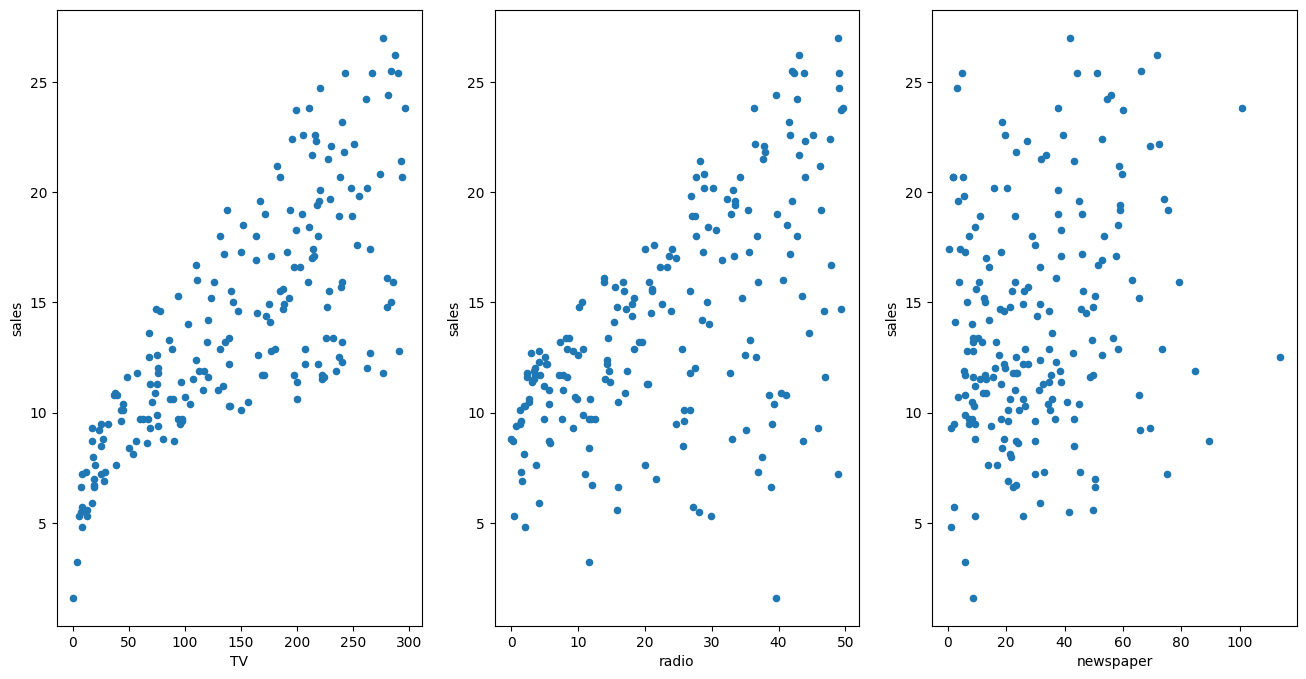

In [12]:
# visualize the relationship between the features and the response using scatterplots
fig, axs= plt.subplots(1,3)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales',ax=axs[2])


In [13]:
# Relation Between independent and dependent variable
cor=data.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

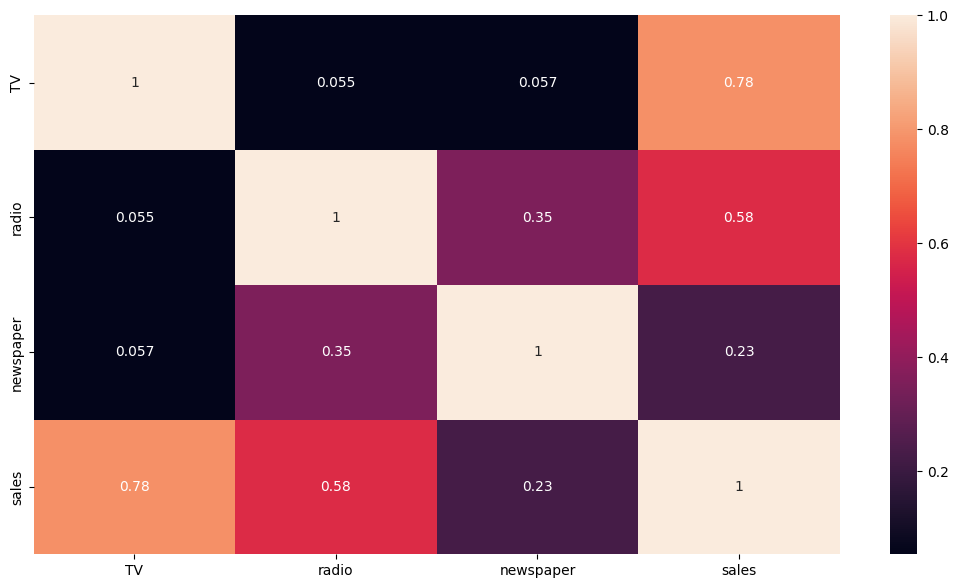

In [14]:
plt.figure(figsize=(13,7))
sns.heatmap(cor,annot=True)

## Data Pre-processing (Splitting)

In [15]:
#create x and y
#feature_cols=['TV']
X=data.drop('sales',axis=1)  #features
Y=data.sales                 #taget variable

In [16]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [18]:
#Train Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2,random_state=42)  # Split the data into training and test sets with 20% test size and random seed 42.

In [19]:
x_train.shape,y_train.shape,y_test.shape,y_train.shape

((160, 3), (160,), (40,), (160,))

In [20]:
x_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


## Model Building & Evaluation

In [21]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

reg.fit(x_train,y_train)  #Fit the training data on a Linear Regression Model

LinearRegression()

In [22]:
#checking weights, beta_1
reg.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [23]:
#checking beta_0
reg.intercept_

2.9790673381226256

In [24]:
#Making prediction on test data, y_cap, estimated y

y_pred=reg.predict(x_test)

In [25]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [26]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: sales, dtype: float64

In [27]:
#Evaluation
from sklearn import metrics
print('MAE => ',metrics.mean_absolute_error(y_test,y_pred))
# Print the mean absolute error (MAE) between the predicted and actual values.

print('MSE => ',metrics.mean_squared_error(y_test,y_pred))
# Print the mean squared error (MSE) between the predicted and actual values.

print('RMSE => ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Print the root mean squared error (RMSE) between the predicted and actual values.

MAE =>  1.4607567168117606
MSE =>  3.174097353976104
RMSE =>  1.7815996615334502


## R-squared score

R-squared is a statistical measure of how well the predicted values fit the actual values in a regression model. It is a goodness of fit measure, calculated as the square of the correlation between the predicted values and the actual values.

* An R-squared of 1 indicates that the predicted values perfectly fit the actual values.
* An R-squared of 0 indicates that the predicted values do not fit the actual values at all.

R-squared is calculated as follows: <br>
R^2 = 1 - (sum of squared residuals / total variance)

where:

* `sum of squared residuals` is the sum of the squared differences between the predicted values and the actual values.
* `total variance` is the total variation in the actual values.

R-squared is a useful measure of how well a regression model fits the data, but it is important to note that it is not a perfect measure. It can be affected by the number of independent variables in the model, and it can also be affected by outliers.

Here are some additional things to keep in mind about R-squared:

* R-squared can be negative. This means that the predicted values are worse than the mean of the actual values.
* R-squared can be equal to 0 even if the model is significant. This means that the model does not explain any of the variation in the data.
* R-squared can be increased by adding more independent variables to the model, even if those variables are not actually related to the dependent variable.

Overall, R-squared is a useful measure of how well a regression model fits the data, but it is important to use it in conjunction with other measures of model fit, such as the mean squared error (MSE).


In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)  # Calculate the R^2 score between the predicted and actual values.

0.899438024100912

C:\Users\tanis\AppData\Local\Temp\ipykernel_3700\888375340.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)
C:\Users\tanis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tanis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: Futur

<Axes: xlabel='sales', ylabel='Density'>

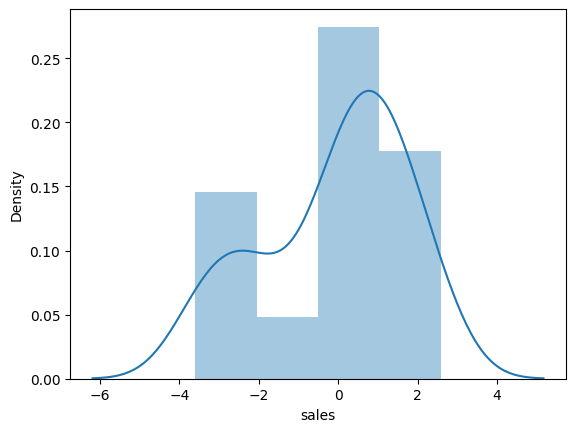

In [29]:
# Create a distribution plot of the residuals of the regression model.
sns.distplot(y_test-y_pred)
# The residuals are the differences between the predicted values and the actual values.
# A good fit will have residuals that are normally distributed with a mean of 0.
# If the residuals are not normally distributed, or if the mean of the residuals is not 0, then the model may not be a good fit.